In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
ls

cnn_model.json                img-20220113T072326Z-001.zip
cnn_model_weight.h5           prediction_viewnum.ipynb
img-20210825T004205Z-001.zip  test-20220113T065354Z-001.zip


In [ ]:
!unzip img-20220113T072326Z-001.zip #解凍

Archive:  img-20220113T072326Z-001.zip
  inflating: img/.DS_Store           
  inflating: img/middle/449.png      
  inflating: img/middle/444.png      
  inflating: img/middle/443.png      
  inflating: img/middle/442.png      
  inflating: img/middle/446.png      
  inflating: img/middle/441.png      
  inflating: img/middle/440.png      
  inflating: img/middle/433.png      
  inflating: img/middle/447.png      
  inflating: img/middle/434.png      
  inflating: img/middle/436.png      
  inflating: img/middle/430.png      
  inflating: img/middle/437.png      
  inflating: img/middle/428.png      
  inflating: img/middle/426.png      
  inflating: img/middle/445.png      
  inflating: img/middle/425.png      
  inflating: img/middle/432.png      
  inflating: img/middle/439.png      
  inflating: img/middle/431.png      
  inflating: img/middle/435.png      
  inflating: img/middle/424.png      
  inflating: img/low/449.png         
  inflating: img/low/446.png         
  inflating

In [ ]:
!unzip test-20220113T065354Z-001.zip

Archive:  test-20220113T065354Z-001.zip
  inflating: test/middle/491.png     
  inflating: test/middle/480.png     
  inflating: test/middle/498.png     
  inflating: test/middle/497.png     
  inflating: test/middle/495.png     
  inflating: test/middle/499.png     
  inflating: test/middle/483.png     
  inflating: test/middle/481.png     
  inflating: test/middle/485.png     
  inflating: test/middle/494.png     
  inflating: test/middle/496.png     
  inflating: test/middle/489.png     
  inflating: test/middle/482.png     
  inflating: test/middle/493.png     
  inflating: test/middle/490.png     
  inflating: test/middle/487.png     
  inflating: test/middle/484.png     
  inflating: test/middle/486.png     
  inflating: test/middle/488.png     
  inflating: test/middle/474.png     
  inflating: test/middle/476.png     
  inflating: test/middle/473.png     
  inflating: test/middle/492.png     
  inflating: test/middle/479.png     
  inflating: test/low/494.png        
  inflatin

In [ ]:
#1 ライブラリのインポート等

import keras
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
#from keras.utils import plot_model #これはKerasのバージョンなどにより使えないのでコメントアウト
from keras.utils import np_utils #keras.utils.to_categoricalでエラーが出るので追加
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import time

In [ ]:
#2 各種設定 

train_data_path = 'img' # ここを変更。Colaboratoryにアップロードしたzipファイルを解凍後の、データセットのフォルダ名を入力

image_size = 80 # ここを変更。必要に応じて変更してください。「28」を指定した場合、縦28横28ピクセルの画像に変換します。

color_setting = 3  #ここを変更。データセット画像のカラー：「1」はモノクロ・グレースケール。「3」はカラー。

folder = ['high','middle','low'] # ここを変更。データセット画像のフォルダ名（クラス名）を半角英数で入力

class_number = len(folder)
print('今回のデータで分類するクラス数は「', str(class_number), '」です。')


今回のデータで分類するクラス数は「 3 」です。


In [ ]:
#データセットの読み込みとデータ形式の設定・正規化・分割 
X_image = []  
Y_label = [] 
for index, name in enumerate(folder):
  read_data = train_data_path + '/' + name
  files = glob.glob(read_data + '/*.png')
  print('--- 読み込んだデータセットは', read_data, 'です。')

  for i, file in enumerate(files):  
    if color_setting == 1:
      img = load_img(file, color_mode = 'grayscale' ,target_size=(image_size, image_size))  
    elif color_setting == 3:
      img = load_img(file, color_mode = 'rgb' ,target_size=(image_size, image_size))
    array = img_to_array(img)
    X_image.append(array)
    Y_label.append(index)

X_image = np.array(X_image)
Y_label = np.array(Y_label)

X_image = X_image.astype('float32') / 255
#Y_label = keras.utils.to_categorical(Y_label, class_number)
Y_label = np_utils.to_categorical(Y_label, class_number)

train_images, valid_images, train_labels, valid_labels = train_test_split(X_image, Y_label, test_size=0.10)
x_train = train_images
y_train = train_labels
x_test = valid_images
y_test = valid_labels

--- 読み込んだデータセットは img/high です。
--- 読み込んだデータセットは img/middle です。
--- 読み込んだデータセットは img/low です。


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 80, 80, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 40, 40, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 128)       18560     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 40, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 20, 20, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 102400)            0

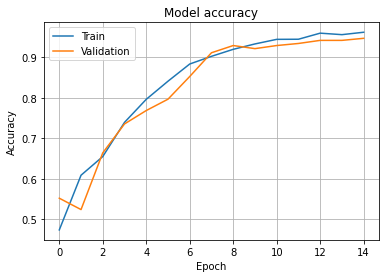

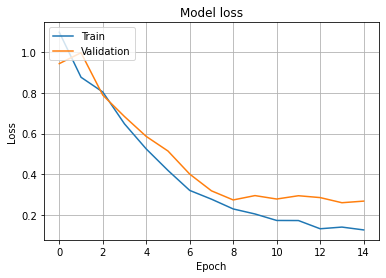

Loss: 0.26890623569488525 （損失関数値 - 0に近いほど正解に近い）
Accuracy: 94.65649127960205 % （精度 - 100% に近いほど正解に近い）
Computation time（計算時間）:109.260 sec（秒）


In [ ]:
#4 機械学習（人工知能）モデルの作成 – 畳み込みニューラルネットワーク（CNN）・学習の実行等

model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same',
          input_shape=(image_size, image_size, color_setting), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))               
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))                
model.add(Dropout(0.5))                                   
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))                                 
model.add(Dense(class_number, activation='softmax'))

model.summary()
#plot_model(model, to_file='model.png') #ここはKerasのバージョンなどにより使えないのでコメントアウト

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

start_time = time.time()

# ここを変更。必要に応じて「batch_size=」「epochs=」の数字を変更してみてください。
history = model.fit(x_train,y_train, batch_size=64, epochs=15, verbose=1, validation_data=(x_test, y_test))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

open('cnn_model.json','w').write(model.to_json())
#model.save_weights('cnn_weights.h5') 
model.save('cnn_model_weight.h5') #モデル構造と重みを1つにまとめることもできます

score = model.evaluate(x_test, y_test, verbose=0)
print('Loss:', score[0], '（損失関数値 - 0に近いほど正解に近い）') 
print('Accuracy:', score[1] * 100, '%', '（精度 - 100% に近いほど正解に近い）') 
print('Computation time（計算時間）:{0:.3f} sec（秒）'.format(time.time() - start_time))

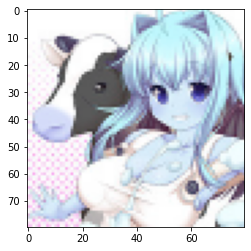

1/1 [==============================] - 0s 78ms/step
画像認識AIは「 high 」の確率を 95 % と予測しました。
画像認識AIは「 middle 」の確率を 0 % と予測しました。
画像認識AIは「 low 」の確率を 4 % と予測しました。
-------------------------------------------------------
画像認識AI：閲覧数 の予測結果は、「 high 」です。


In [ ]:
#1 ライブラリのインポート等

import cv2 
import matplotlib.pyplot as plt
import numpy as np
from keras.models import model_from_json
from keras.models import load_model #model = load_model('cnn_model_weight.h5') #model.save('cnn_model_weight.h5') で保存したファイルを読み込む場合に使用

#2 各種設定

recognise_image = './test/high-high/499.png' #ここを変更。画像認識したい画像ファイル名。（実行前に認識したい画像ファイルを1つアップロードしてください）


folder = ['high', 'middle','low']  #ここを変更。今回は日本語の表示にしたかったので、folder = ['circle', 'cross'] の順番で日本語にしています。

image_size = 80 # ここを変更。「28」を指定した場合、縦28横28ピクセルの画像に変換
                # 「② 用意した自前画像で学習」と同じにする。

color_setting = 3  # ここを変更。画像認識する画像のカラー。「1」はモノクロ・グレースケール。「3」はカラー
                   # 「② 用意した自前画像で学習」と同じにする。

#3 各種読み込み
model = model_from_json(open('cnn_model.json', 'r').read())
#model.load_weights('cnn_weights.h5')
model = load_model('cnn_model_weight.h5') #model.save('cnn_model_weight.h5') で保存したファイルを読み込む場合に使用

#4 画像の表示・各種設定等
img = cv2.imread(recognise_image, 1)  #ここを変更。モノクロ・グレースケールの場合は「0」。カラーの場合は「1」 。         
img = cv2.resize(img, (image_size, image_size))
plt.imshow(img)
#plt.gray()  #ここを変更。カラーの場合は「plt.gray()」を消す。モノクロ・グレースケールの場合は「plt.gray()」が無いと変な色になります。
plt.show()

img = img.reshape(image_size, image_size, color_setting).astype('float32')/255 

#5 予測と結果の表示等
prediction = model.predict(np.array([img]), batch_size=2, verbose=1)
result = prediction[0]

for i, accuracy in enumerate(result):
  print('画像認識AIは「', folder[i], '」の確率を', int(accuracy * 100), '% と予測しました。')

print('-------------------------------------------------------')
print('画像認識AI：閲覧数 の予測結果は、「', folder[result.argmax()],'」です。')